<a href="https://colab.research.google.com/github/FelipeGBarreto/Projects/blob/master/Stroker_Analysis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=purple size=6 face="cursive"><u>Dataset</u>  - <i><q>Stroker</q></i>
- <font color=black size=3>Fonte: Kaggle

#<font color=cian size=5 face="cursive">Bibliotecas a serem utilizadas

In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#<font color=cian size=5 face="cursive">Conjunto de dados


In [238]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df = df.drop(columns="id")

df.head(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


#<font color=cian size=5 face="cursive">Atribuindo valores numéricos aos alfabéticos

In [239]:
for field in df.columns:
    if np.dtype(df[field]) == 'object':
        print("{} --> {}".format(field,df[field].unique()))

gender --> ['Male' 'Female' 'Other']
ever_married --> ['Yes' 'No']
work_type --> ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type --> ['Urban' 'Rural']
smoking_status --> ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [240]:
df.gender = df.gender.map({'Male':1, 'Female':0})
df.ever_married = df.ever_married.map({'Yes':1, 'No':0})
df.Residence_type = df.Residence_type.map({'Urban':1, 'Rural':0})
df.work_type = df.work_type.map({'Private':1, 'Self-employed':2,'Govt_job':3, 
                                 'children':4,'Never_worked':5})
df.smoking_status = df.smoking_status.map({'formerly smoked':1, 'never smoked':2,
                                           'smokes':3, 'Unknown':4})

df=df.query("gender==1 or gender==0") # Retirei uma única linha que não havia identificação de gênero (sem representatividade)
df.gender = df.gender.astype('int32')

#<font color=cian size=5 face="cursive">Verificando se há valores em branco e subistituindo pela média dos valores
- <font color=black size=3>Campo 'bmi'

In [241]:
def preencher_nan (data_frame, campo):
    data_frame[campo] = data_frame[campo].fillna(data_frame[campo].mean())
    
preencher_nan(df,"bmi")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int32  
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int32(1), int64(7)
memory usage: 459.0 KB


#<font color=cian size=5 face=cursive>Análise dos dados

<font color=darkgreen size=4 face=cursive>Quais variáveis estão mais relacionadas com derrames cerebrais?

In [242]:
print("Correlação entre quem teve derrame e as demais variáveis:")
df.corr()[-1:]

Correlação entre quem teve derrame e as demais variáveis:


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
stroke,0.009081,0.245239,0.127891,0.134905,0.108299,-0.058261,0.015415,0.131991,0.038917,-0.066471,1.0


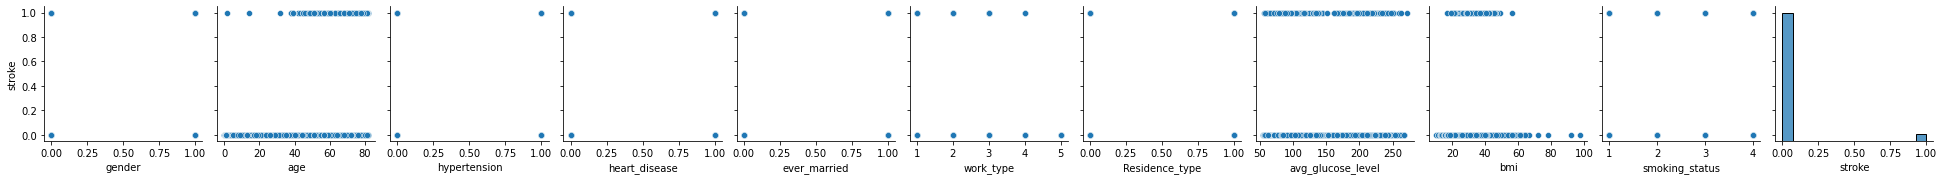

In [243]:
sns.pairplot(data=df,y_vars='stroke')

<font color= gray size=4 face=cursive>

*   Há cinco variáveis que mais chamam a atenção, as quais mostram uma corelação com a variável derrame, são elas:
  - age;
  - heart_disease;
  - avg_glucose_level;
  - hypertension;
  - ever_married.


In [244]:
df[["stroke","age","heart_disease","avg_glucose_level","hypertension","ever_married"]].corr()[-1:]

,stroke,age,heart_disease,avg_glucose_level,hypertension,ever_married
ever_married,0.108299,0.679084,0.114601,0.155329,0.164187,1.0


Classes de idade:

    ► A: 0  - 20 anos
    ► B: 21 - 35 anos
    ► C: 36 - 50 anos
    ► D: 51 - 65 anos
    ► E: 66 - 82 anos

In [245]:
classes = [0, 20, 35, 50, 65, 82]
labels = ["00-20","21-35","36-50","51-65","66-82"]

classificando_age = pd.cut(x = df_stroke.age,bins = classes,labels = labels,include_lowest = True)

freq_age = pd.value_counts(classificando_age).sort_index()
freq_age_perct = pd.value_counts(classificando_age, normalize=True).sort_index()

print(f"Total de Pessoas entrevistadas: {df.gender.count()}")
print(f"Total de Pessoas da amostra que tiveram AVC: {df_stroke.gender.count()}\n")

dist_freq_age = pd.DataFrame({"freq":freq_age,"Perct (%)": 100*freq_age_perct.round(3)})

print("Percentual de pessoas que tiveram derrame de acordo com a idade:")
dist_freq_age.columns.name = "Classes de Idade"

dist_freq_age

Total de Pessoas entrevistadas: 5109
Total de Pessoas da amostra que tiveram AVC: 249

Percentual de pessoas que tiveram derrame de acordo com a idade:


Classes de Idade,freq,Perct (%)
00-20,2,0.8
21-35,1,0.4
36-50,20,8.0
51-65,70,28.1
66-82,156,62.7


<font color=green size=4 face=cursiva>Constatando através de gráficos

In [246]:
df["age_class"]=classificando_age
df_stroke["age_class"]=classificando_age

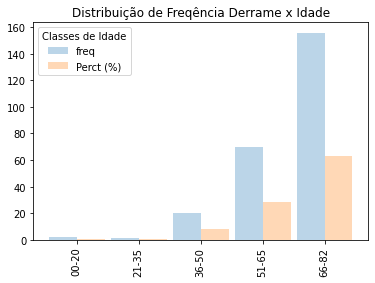

In [247]:
ax=dist_freq_age.plot.bar(width=0.9, alpha=0.3, align='center')
ax.set_title("Distribuição de Freqência Derrame x Idade");

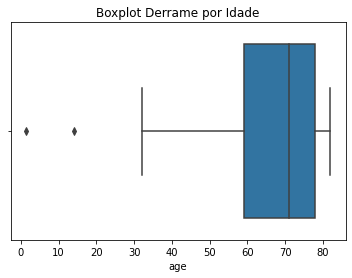

In [248]:
stroke_age = sns.boxplot(df_stroke.age)
stroke_age.set_title("Boxplot Derrame por Idade");

Da amostra, tomando somente aquelas pessoas que já sofreram derrame em algum momento da vida, temos:
- Pessoas com idade superior a 59 anos que tiveram derrame é três vezes o número de pessoas com idade abaixo de 59 anos.

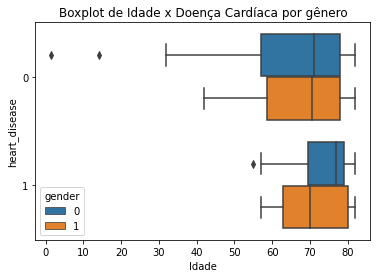

In [249]:
ax = sns.boxplot(x='age', y='heart_disease',data=df_stroke, orient='h', hue='gender')
ax.set_title("Boxplot de Idade x Doença Cardíaca por gênero")
ax.set_xlabel("Idade");

### Histograma de idade de pessoas entrevistadas

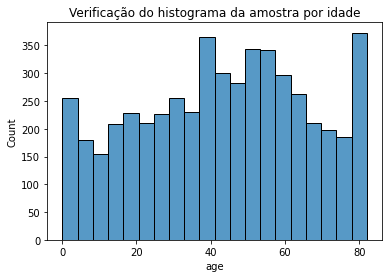

In [250]:
ax=sns.histplot(df.age)
ax.set_title("Verificação do histograma da amostra por idade");

### Histograma de pessoas entrevistadas que sofreram derrame

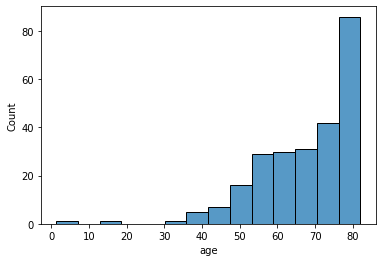

In [251]:
sns.histplot(df_stroke.age)

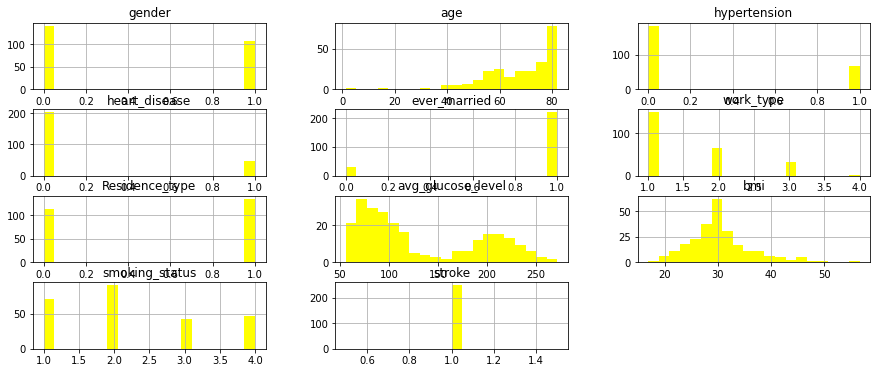

In [252]:
df_stroke.hist(bins=20, figsize=(15, 6), color='yellow');

In [253]:
df_stroke.groupby(["gender","age_class"])[["gender"]].count()

gender
gender age_class        
0      00-20         2.0
       21-35         1.0
       36-50        14.0
       51-65        33.0
       66-82        91.0
1      00-20         NaN
       21-35         NaN
       36-50         6.0
       51-65        37.0
       66-82        65.0

<font color=cian size=4 face=cursive><b>Previsão com análise regressiva

In [254]:
dataset = df[["stroke","age","heart_disease","avg_glucose_level","hypertension","ever_married"]]
dataset.head()

,stroke,age,heart_disease,avg_glucose_level,hypertension,ever_married
0,1,67.0,1,228.69,0,1
1,1,61.0,0,202.21,0,1
2,1,80.0,1,105.92,0,1
3,1,49.0,0,171.23,0,1
4,1,79.0,0,174.12,1,1


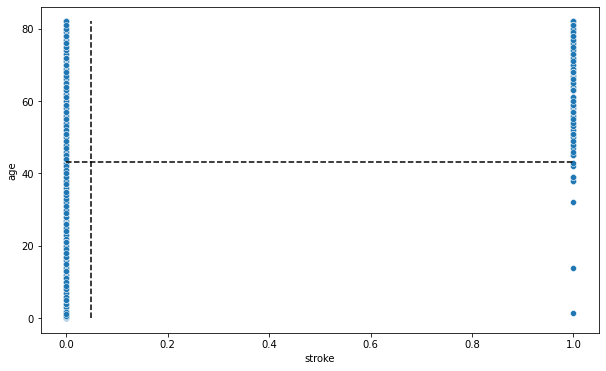

In [255]:
x = dataset.stroke
y = dataset.age

ax = sns.scatterplot(x,y)
ax.figure.set_size_inches(10, 6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), colors='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), colors='black', linestyles='dashed')

# Regressão Linear

In [256]:
import statsmodels.api as sm

In [257]:
dataset = dataset[["stroke","age"]]
Y = dataset.stroke
X = sm.add_constant(dataset.age)

In [258]:
resultado_regressao = sm.OLS(Y, X).fit()
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     326.8
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           7.44e-71
Time:                        03:18:17   Log-Likelihood:                 754.65
No. Observations:                5109   AIC:                            -1505.
Df Residuals:                    5107   BIC:                            -1492.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0522      0.006     -8.285      0.0

In [259]:
dataset['Y_previsto'] = resultado_regressao.predict()
dataset.head()

,stroke,age,Y_previsto
0,1,67.0,0.104248
1,1,61.0,0.090236
2,1,80.0,0.134607
3,1,49.0,0.062212
4,1,79.0,0.132272


In [260]:
resultado_regressao = sm.OLS(Y, X, missing='drop').fit()
resultado_regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 stroke   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     326.8
Date:                Fri, 12 Mar 2021   Prob (F-statistic):           7.44e-71
Time:                        03:18:17   Log-Likelihood:                 754.65
No. Observations:                5109   AIC:                            -1505.
Df Residuals:                    5107   BIC:                            -1492.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0522      0.006     -8.285      0.000      -0.065      -0.040
age            0.0023      0.000     18.078      0.000       0.002       0.003
==============================================================================
Omnibus:                     3920.456   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51274.246
Skew:                           3.794   Prob(JB):                         0.00
Kurtosis:                      16.538   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
resultado_regressao.conf_int(alpha=0.05)

,0,1
const,-0.064573,-0.039863
age,0.002082,0.002589


In [263]:
dataset['Residuos'] = resultado_regressao.resid
dataset.head()

,stroke,age,Y_previsto,Residuos
0,1,67.0,0.104248,0.895752
1,1,61.0,0.090236,0.909764
2,1,80.0,0.134607,0.865393
3,1,49.0,0.062212,0.937788
4,1,79.0,0.132272,0.867728


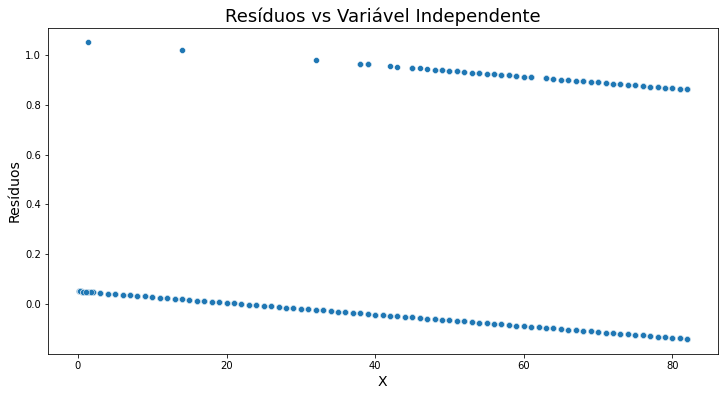

In [265]:
ax = sns.scatterplot(x=dataset.age, y=dataset.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Variável Independente', fontsize=18)
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

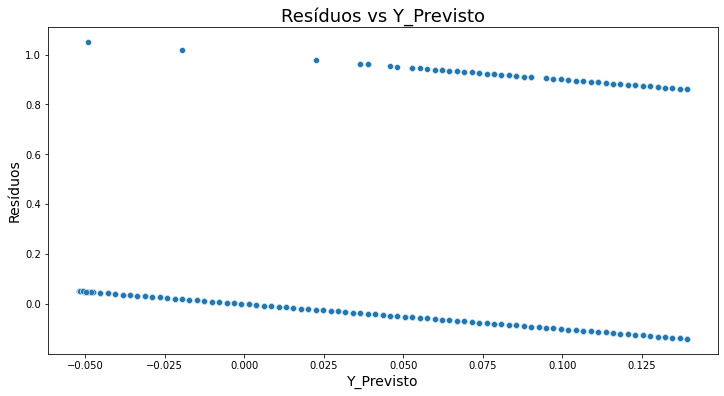

In [266]:
ax = sns.scatterplot(x=dataset.Y_previsto, y=dataset.Residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

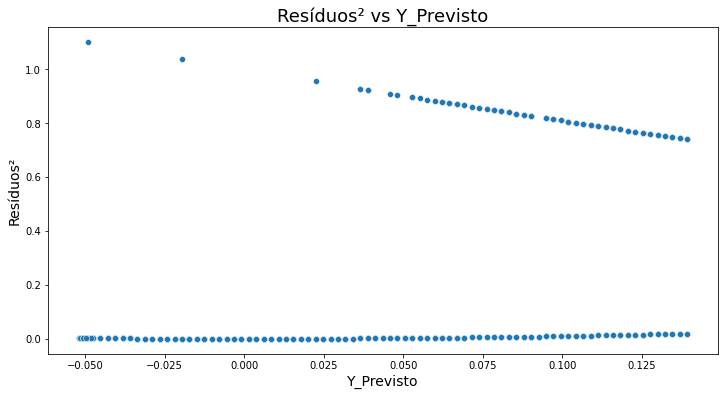

In [267]:
ax = sns.scatterplot(x=dataset.Y_previsto, y=dataset.Residuos**2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduos² vs Y_Previsto', fontsize=18)
ax.set_xlabel('Y_Previsto', fontsize=14)
ax.set_ylabel('Resíduos²', fontsize=14)
ax